<h2> <b> Датасет: </b> https://www.kaggle.com/datasets/ashydv/housing-dataset </h2>

<b> 1) Завантажити дані </b>, вивести назви колонок і розмір датасета 


In [2]:
import pandas as pd


data = pd.read_csv('Housing.csv')
print("Назви колонок:", data.columns)
print("Розмір датасету:", data.shape)
print(data.head)


Назви колонок: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Розмір датасету: (545, 13)
<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no       

<b> 2) Опрацювати пропуски (по можливості заповнити їх або видалити) </b>

data.isnull перевіряє кожен елемент у датафреймі на наявність значення NaN (not a number), тобто пропусків, та повертає булеве значення: True or False.
.sum() підраховує к-ть отриманих значень True. 


In [6]:

missing_values = data.isnull().sum()

print("Кількість пропусків у кожному стовпці:")
print(missing_values)

# Загальна кількість пропусків у датасеті
total_missing = data.isnull().sum().sum()
print(f"\nЗагальна кількість пропусків: {total_missing}")


Кількість пропусків у кожному стовпці:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Загальна кількість пропусків: 0


Пропусків нема, значить заповнювати нічого :) 

<b> 3) Візуалізувати дані: </b>  побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

Цільова змінна у нашому випадку - ціна будинку. Візуалізуємо залежності фіч одна від одної.

In [11]:
%pip install seaborn

Деякі стовпці в датасеті містять не числові значення, які не
можна використовувати для обчислення кореляції, оскільки кореляція працює лише з числовими даними. 
Щоб зробити дані придатними для аналізу, ми перетворили:
Бінарні значення (yes/no) на числа: yes -> 1, no -> 0.
Категоріальні значення з більше ніж двома категоріями (наприклад, 'furnished', 'semi-furnished', 'unfurnished') у dummy змінні.
Даммі змінні — це спосіб кодування категоріальних даних у числові значення. Для кожної категорії створюється окрема бінарна змінна, яка приймає значення:
1, якщо рядок належить до цієї категорії.
0, якщо ні.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Перетворення категоріальних змінних у числові
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data_encoded = data.copy()


binary_mapping = {'yes': 1, 'no': 0}
for column in categorical_columns[:-1]:  # Усі, крім furnishingstatus
    data_encoded[column] = data[column].map(binary_mapping)

# Перетворюємо furnishingstatus за допомогою get_dummies
data_encoded = pd.get_dummies(data_encoded, columns=['furnishingstatus'], drop_first=True)




Heatmap (матриця кореляції) відображає ступінь залежності між усіма числовими ознаками.
Значення кореляції варіюються від -1 (сильна обернена залежність) до 1 (сильна пряма залежність).
Теплі кольори (червоні) означають сильну позитивну кореляцію, холодні кольори (сині) — сильну негативну.
Бачимо доволі очевидні результати, ціна будинку найбільше залежить від його площі, значення - 0,54

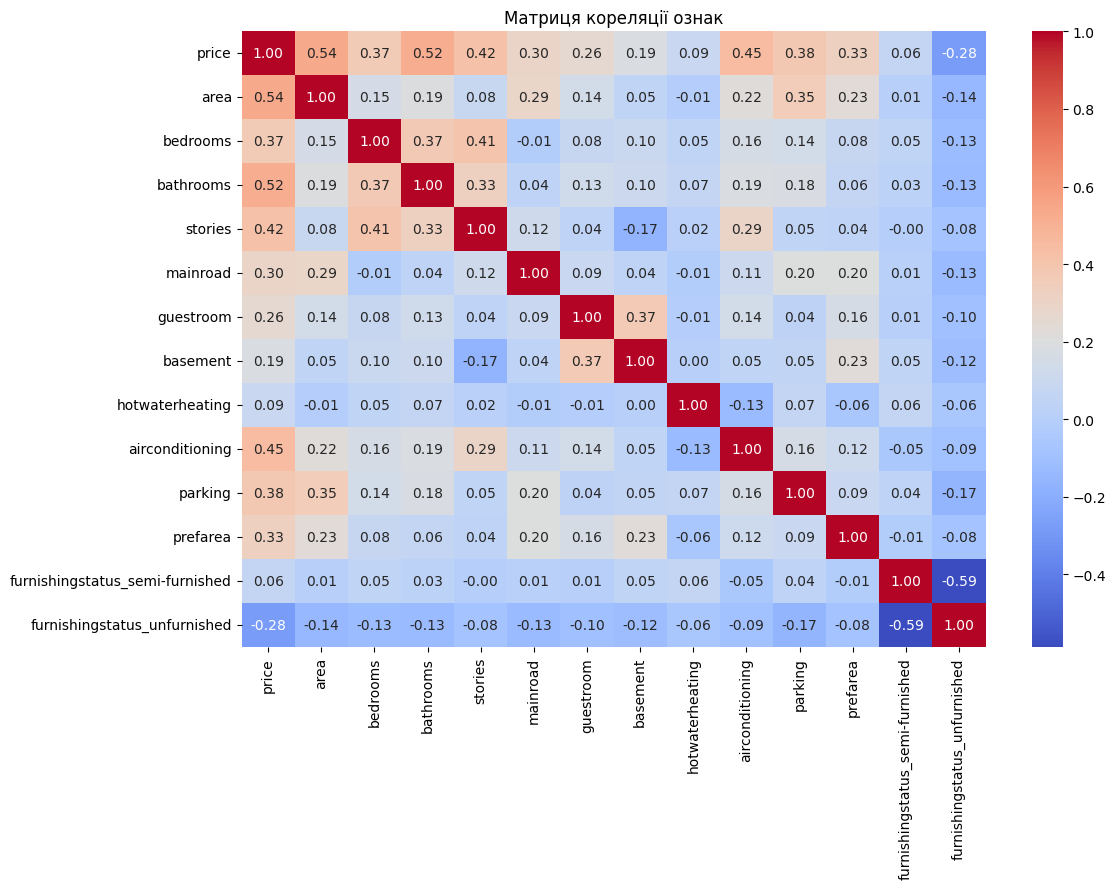

In [16]:
# Heatmap для кореляції між ознаками та цільовою змінною
plt.figure(figsize=(12, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матриця кореляції ознак")
plt.show()

Гістограми розподілу ознак показують, як значення певних числових ознак розподіляються у вибірці.
Допомагають побачити, чи є ознака нормально розподіленою, чи має вона викиди.
Наприклад, для площі:
Ось Х: значення площі
Ось Y: частота (кількість будинків), яка має відповідне значення на осі X, тобто відповідну площу.

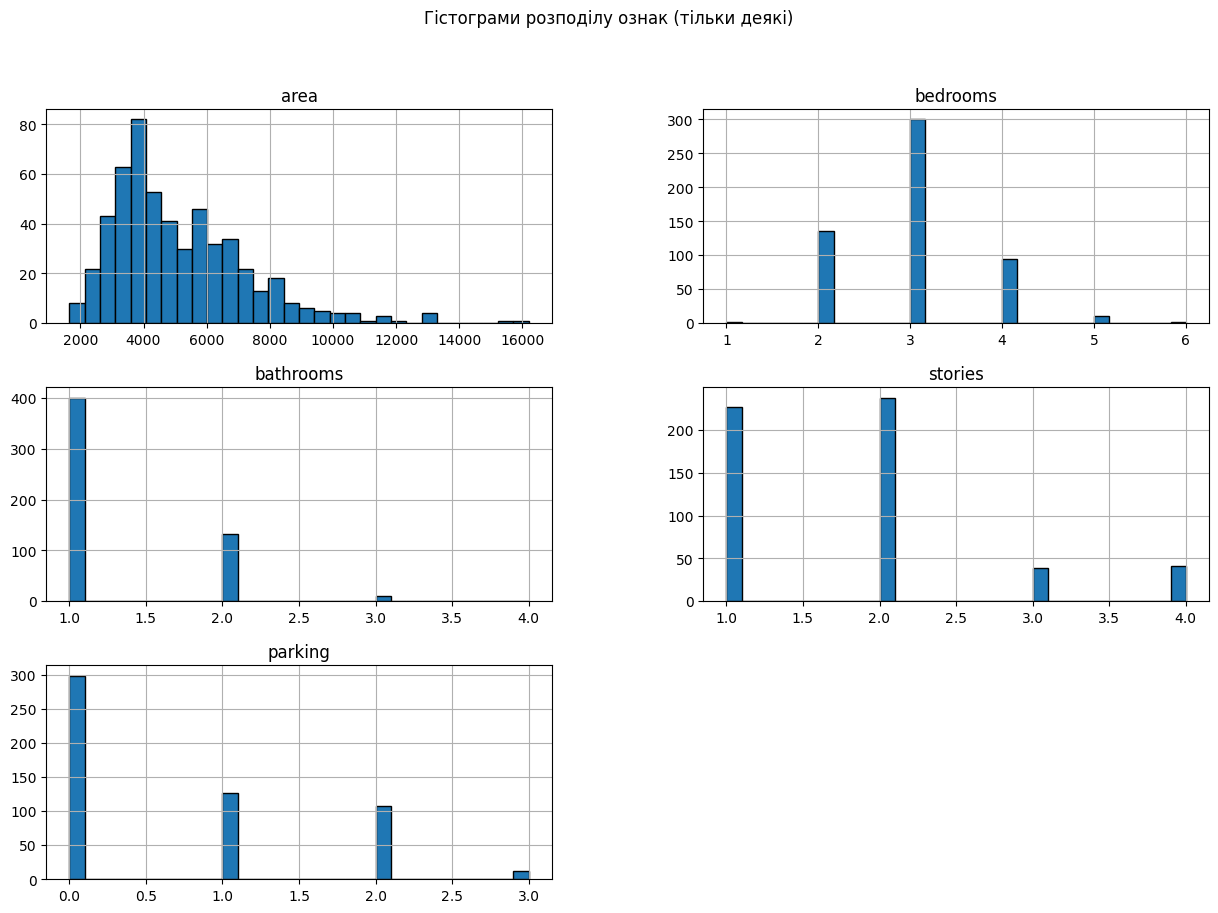

In [17]:
# Гістограми для розподілу основних ознак
data_encoded[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Гістограми розподілу ознак (тільки деякі)")
plt.show()

Boxplot графіки показують розподіл значень ознаки  відносно цільової змінної (price).
Можна побачити:
Медіану (центральна лінія).
Інтерквартильний розмах (IQR) — зона між нижнім і верхнім квартилями.
Викиди (точки поза "вусами").
Це дає змогу зрозуміти, як ціна залежить від конкретної ознаки.

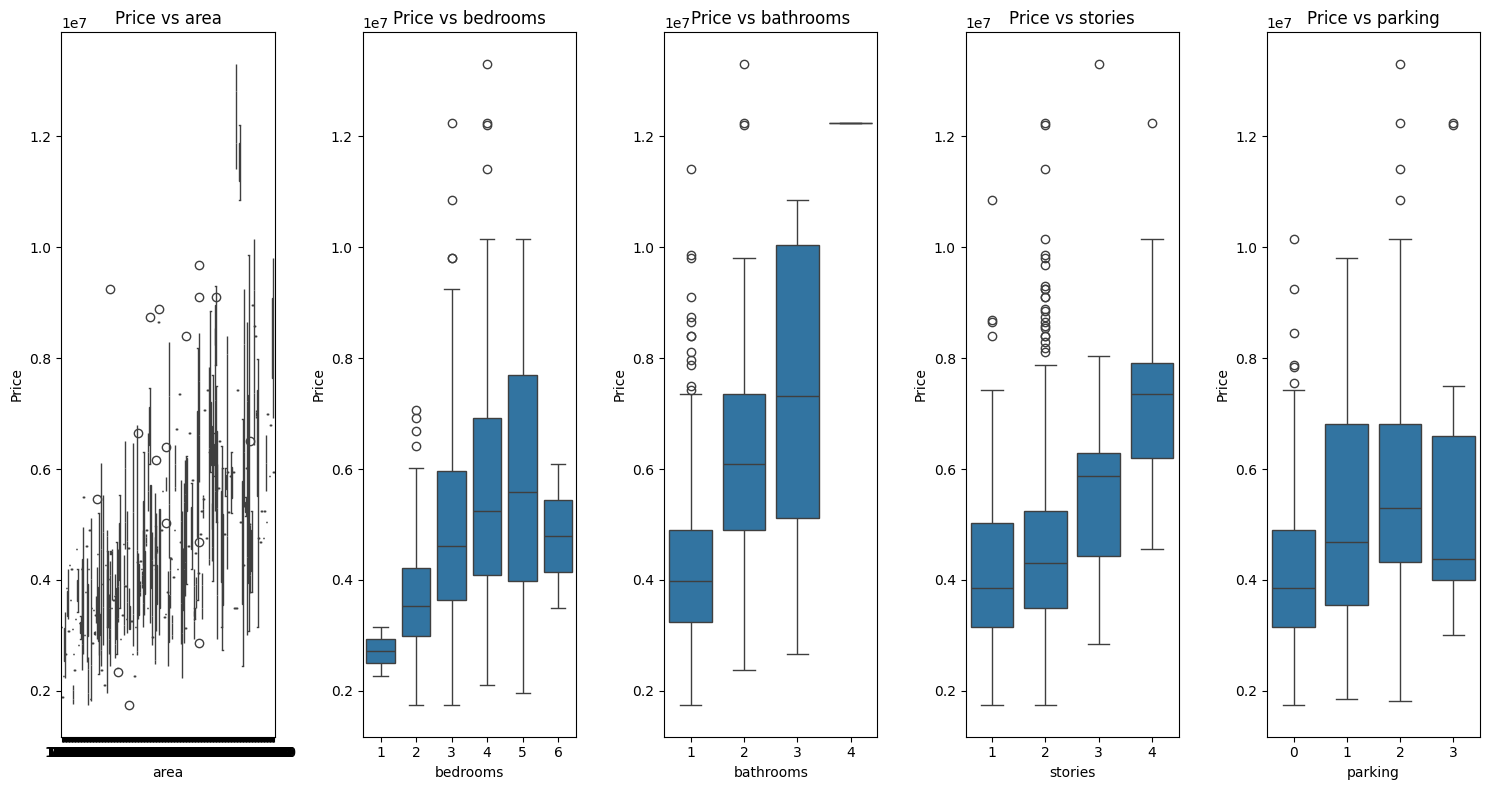

In [19]:
# Boxplot для ознак відносно цільової змінної (price)
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 8))
for feature in selected_features:
    plt.subplot(1, len(selected_features), selected_features.index(feature) + 1)
    sns.boxplot(x=data_encoded[feature], y=data_encoded['price'])
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

Що бачимо? Розберемо за прикладом першого графіку:
Ось X: area — площа будинку.
Ось Y: price — ціна будинку.
З графіка видно, що із збільшенням площі будинку ціна також загалом збільшується, хоча є значна варіативність (дані розкидані).
Зв’язок між площею і ціною позитивний: будинки з більшою площею здебільшого дорожчі.
Присутні точки, що значно відхиляються (outliers), що свідчить про екстремальні ціни.

4) <b> Нормалізувати дані </b>
   
Нормалізація — це процес масштабування числових ознак, щоб їхні значення потрапляли у певний діапазон (найчастіше [0, 1] або [-1, 1]). 
Це важливо для машинного навчання, оскільки багато алгоритмів є чутливими до масштабів ознак (наприклад, SVM, KNN, Gradient Descent).
Для чого треба:
Зрівнювання ваги ознак: Деякі алгоритми (наприклад, KNN, SVM) обчислюють відстані між точками, і великі масштаби ознак можуть домінувати над іншими, що спотворює результати.
Прискорення збіжності: Алгоритми оптимізації, такі як градієнтний спуск, працюють ефективніше, якщо всі ознаки знаходяться в одному масштабі.
Запобігання числовим похибкам: Великі значення можуть призводити до нестабільності під час обчислень.

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Створення об'єкта нормалізації
scaler = MinMaxScaler()

# Масштабування лише числових ознак
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Перші 5 рядків нормалізованих даних:")
print(data.head())


Перші 5 рядків нормалізованих даних:
      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667      yes        no   
1  0.909091  0.502405       0.6   1.000000  1.000000      yes        no   
2  0.909091  0.571134       0.4   0.333333  0.333333      yes        no   
3  0.906061  0.402062       0.6   0.333333  0.333333      yes        no   
4  0.836364  0.396564       0.6   0.000000  0.333333      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  0.666667      yes        furnished  
1       no              no             yes  1.000000       no        furnished  
2      yes              no              no  0.666667      yes   semi-furnished  
3      yes              no             yes  1.000000      yes        furnished  
4      yes              no             yes  0.666667       no        furnished  


<b> 5.1: kNN (k-Nearest Neighbors) </b>

kNN відноситься до методів «лінивого навчання», тобто модель не будується під час навчання, а безпосередньо виконується прогноз під час тестування
Алгоритм kNN:
Для кожного нового зразка обчислює відстань до найближчих k сусідів у навчальних даних.
Клас нового зразка визначається більшістю голосів сусідів.
n_neighbors: Кількість сусідів для голосування.
weights: Вага сусідів (uniform — всі рівні, distance — ближчі важать більше).
classification_report: Основні метрики (precision, recall, f1-score).
confusion_matrix: Матриця помилок, показує кількість правильних та неправильних передбачень.

kNN визначає клас для нового зразка, шукаючи найближчих сусідів в тренувальних даних (за певною відстанню, наприклад, евклідовою).
Кількість сусідів (n_neighbors) та метод зважування (weights) підбираються для досягнення найкращих результатів.
GridSearchCV використовується для пошуку оптимальних параметрів моделі через крос-валідацію (cv=5) та підбирає значення n_neighbors (кількість сусідів) та weights.

Алгоритми класифікації, як-от kNN, працюють із категоріальними класами, а не безперервними числовими значеннями. price як числова змінна робить проблему регресії, яку kNN-класифікатор не здатен розв'язати. Тому ми конвертуємо price у категорії (висока, середня і низька ціна), щоб модель могла працювати коректно.

In [24]:
# Перетворення 'price' у категоріальну змінну
data_encoded['price_category'] = pd.qcut(data_encoded['price'], q=3, labels=['low', 'medium', 'high'])

X = data_encoded.drop(columns=['price', 'price_category']) 
y = data_encoded['price_category']

# Розподіл на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Пошук найкращих параметрів для kNN
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)

# Найкраща модель
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("kNN: Найкращі параметри:", grid_search_knn.best_params_)
print("\nClassification Report для kNN:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix для kNN:")
print(confusion_matrix(y_test, y_pred_knn))



kNN: Найкращі параметри: {'n_neighbors': 15, 'weights': 'uniform'}

Classification Report для kNN:
              precision    recall  f1-score   support

        high       0.59      0.71      0.65        58
         low       0.70      0.66      0.68        65
      medium       0.35      0.29      0.32        41

    accuracy                           0.59       164
   macro avg       0.55      0.55      0.55       164
weighted avg       0.58      0.59      0.58       164


Confusion Matrix для kNN:
[[41  5 12]
 [12 43 10]
 [16 13 12]]


Загальна точність (accuracy): 0.59, тобто модель правильно передбачає цільовий клас у 59% випадків. Для простого класифікатора, такого як kNN, це прийнятний результат, але залежно від задачі може бути недостатнім. Але модель все ще працює краще, ніж випадковий вибір (33% для трьох класів).


<b> 5.2: Навчання дерева ухвалення рішень (Decision Tree) </b>
 Дерева ухвалення рішень використовуються для класифікації, прогнозування та регресії. Вони працюють, ітеративно поділяючи дані на основі критеріїв, таких як інформаційний приріст (entropy) чи Gini impurity.
max_depth: Контролює глибину дерева. Дерево з великою глибиною може перенавчитися, а з малою — недонавчитися.
min_samples_split: Визначає мінімальну кількість об'єктів у вузлі для поділу. Збільшуючи значення, ми зменшуємо кількість вузлів, запобігаючи перенавчанню.

Decision Tree: Найкращі параметри: {'max_depth': 20, 'min_samples_split': 10}

Classification Report для Decision Tree:
              precision    recall  f1-score   support

        high       0.70      0.74      0.72        58
         low       0.74      0.66      0.70        65
      medium       0.36      0.39      0.37        41

    accuracy                           0.62       164
   macro avg       0.60      0.60      0.60       164
weighted avg       0.63      0.62      0.63       164


Confusion Matrix для Decision Tree:
[[43  3 12]
 [ 5 43 17]
 [13 12 16]]


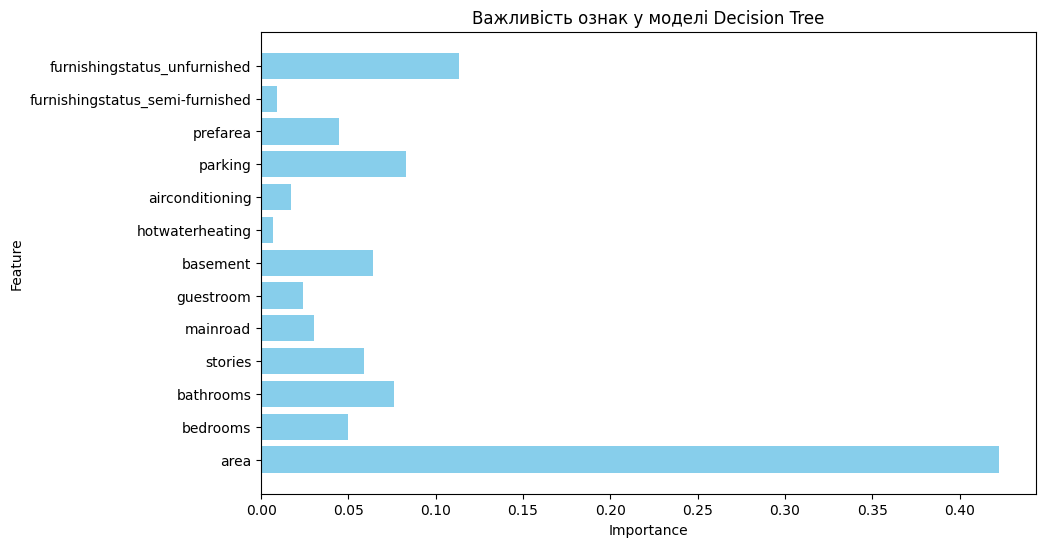

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Ініціалізація моделі
decision_tree = DecisionTreeClassifier(random_state=42)

# Налаштування параметрів для GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Пошук найкращих параметрів
grid_search_dt = GridSearchCV(decision_tree, param_grid, scoring='accuracy', cv=5)
grid_search_dt.fit(X_train, y_train)

# Найкраща модель
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)


print("Decision Tree: Найкращі параметри:", grid_search_dt.best_params_)
print("\nClassification Report для Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix для Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))


feature_importances = best_dt.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.title("Важливість ознак у моделі Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Найкращі параметри, знайдені GridSearch:
max_depth: 20
Це означає, що дерево може мати до 20 рівнів глибини. Це оптимальна глибина, яка дозволяє балансувати між перенавчанням і недонавчанням.
min_samples_split: 10
Мінімум 10 зразків потрібно для поділу вузла. Це зменшує ризик перенавчання, оскільки дерево не буде створювати вузли з дуже малими групами даних.

High (ціни високого класу):
Precision (Точність): 70% означає, що з усіх передбачених моделей класів "high", 70% були правильними.
Recall (Повнота): 74% означає, що 74% об'єктів з класу "high" були правильно визначені моделлю.
F1-score: 72% є гармонійним середнім між precision та recall, що свідчить про гарний баланс між ними.

Low (ціни низького класу):
Точність і повнота дещо вищі, ніж у класу "high", що свідчить про те, що модель краще справляється з цим класом.
Medium (ціни середнього класу):

Precision = 36%, Recall = 39%. Модель значно гірше розпізнає клас "medium", можливо, через меншу кількість даних або перехідний характер цього класу.


<b> 5.3 Support Vector Machine (SVM) </b>

Метод опорних векторів (SVM) — це алгоритм для класифікації, який намагається знайти оптимальну гіперплощину, що розділяє дані на класи. Основні принципи роботи:

Гіперплощина: Модель створює межу, яка максимально розділяє дані між класами.

Опорні вектори: Точки даних, які найближче до межі розділення, і вони визначають положення цієї межі.

Ядро (kernel): Дозволяє перетворити дані в простір вищої розмірності, щоб зробити їх лінійно роздільними, якщо вони не є такими в початковому просторі.
SVM підтримує як лінійні, так і нелінійні розділення через вибір функції ядра (наприклад, RBF, polynomial, sigmoid).

C (Regularization parameter):
Впливає на те, як сильно модель намагається уникнути помилок.
Мале значення C — більше штрафу за помилки, що робить межу розділення плавнішою.
Велике значення C — модель намагається точно класифікувати всі точки, що може призвести до перенавчання.
    
gamma: Визначає вплив окремих точок на модель.
Високе значення gamma означає, що кожна точка має великий вплив, що може створити складну межу (перенавчання).
Низьке значення gamma означає, що точки впливають на широку область.

kernel (Ядро): Вибір функції ядра визначає, як модель обробляє нелінійні дані.
У цьому коді використовується RBF (радіальна базисна функція), яка добре працює для багатьох задач класифікації.


In [27]:
from sklearn.svm import SVC


# Ініціалізація моделі SVM
svm = SVC()
# Налаштування параметрів для GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],   # Контроль за регуляризацією
    'gamma': [1, 0.1, 0.01, 0.001],  # Координує вплив кожної ознаки
    'kernel': ['rbf']  # Радіальна базисна функція (найпопулярніший варіант)
}

# Використання GridSearchCV для пошуку найкращих параметрів
grid_search_svm = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("SVM: Найкращі параметри:", grid_search_svm.best_params_)
print("\nClassification Report для SVM:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix для SVM:")
print(confusion_matrix(y_test, y_pred_svm))


SVM: Найкращі параметри: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Classification Report для SVM:
              precision    recall  f1-score   support

        high       0.60      0.57      0.58        58
         low       0.62      0.46      0.53        65
      medium       0.30      0.44      0.35        41

    accuracy                           0.49       164
   macro avg       0.51      0.49      0.49       164
weighted avg       0.53      0.49      0.51       164


Confusion Matrix для SVM:
[[33  7 18]
 [10 30 25]
 [12 11 18]]


Визначені найкращі параметри моделі:
C = 100: Високе значення регуляризації, модель намагається точно розділити дані, можливо, трохи перенавчаючись.
gamma = 0.001: Низьке значення, що означає, що модель враховує ширший контекст кожної точки, уникаючи надмірної чутливості до конкретних точок.
kernel = 'rbf': Радіальна базисна функція використовується для нелінійного розділення даних.

Загальна точність: 49%: Це досить низький результат, майже половина прогнозів неправильні.


<b> 5.4: Random Forest </b>

Random Forest (випадковий ліс) — це ансамблевий метод машинного навчання, який поєднує кілька дерев рішень для створення більш точної та стійкої моделі. 
Ключові аспекти:
Кожне дерево навчається на випадковому підмножині даних і ознак.
Під час прогнозування кожне дерево "голосує", і результат обирається за більшістю голосів (для класифікації) або усереднюється (для регресії).
Основні параметри:
n_estimators: кількість дерев у лісі.
max_depth: максимальна глибина кожного дерева.
max_features: кількість випадкових ознак, які використовуються під час навчання кожного дерева.

Random Forest: Найкращі параметри: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report для Random Forest:
              precision    recall  f1-score   support

        high       0.83      0.76      0.79        58
         low       0.82      0.72      0.77        65
      medium       0.46      0.61      0.53        41

    accuracy                           0.71       164
   macro avg       0.71      0.70      0.70       164
weighted avg       0.74      0.71      0.72       164


Confusion Matrix для Random Forest:
[[44  2 12]
 [ 1 47 17]
 [ 8  8 25]]


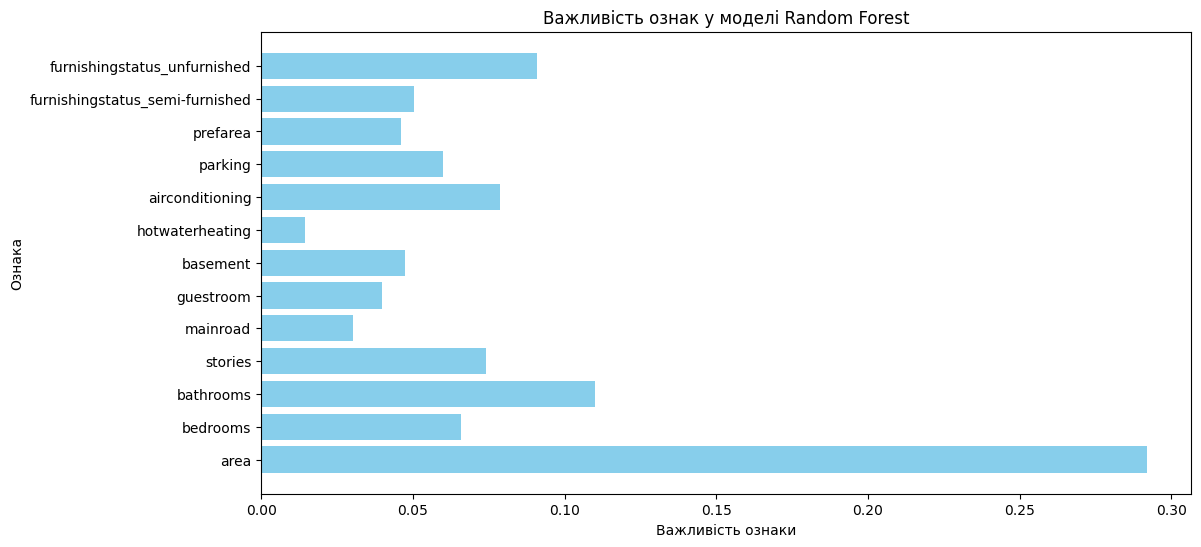

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Налаштування параметрів для GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Кількість дерев
    'max_depth': [10, 20, None],  # Максимальна глибина дерев
    'min_samples_split': [2, 5, 10]  # Мінімальна кількість зразків для поділу вузла
}

# Ініціалізація моделі Random Forest
rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest: Найкращі параметри:", grid_search_rf.best_params_)
print("\nClassification Report для Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix для Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Важливість ознаки")
plt.ylabel("Ознака")
plt.title("Важливість ознак у моделі Random Forest")
plt.show()


<b> 5.5: AdaBoost </b>

AdaBoost (Adaptive Boosting) — це метод ансамблевого навчання, який створює сильний класифікатор шляхом комбінації кількох слабких класифікаторів (зазвичай дерев рішень із глибиною 1, так званих "decision stumps"). Ключові аспекти:
Навчання проходить ітеративно, і кожна нова модель зосереджується на прикладах, які були класифіковані неправильно попередніми моделями.
Кожен приклад у датасеті отримує вагу. Спочатку всі ваги рівні, але в процесі навчання ваги неправильних класифікацій збільшуються.
Прогноз є зваженим голосуванням усіх слабких моделей.

AdaBoost: Найкращі параметри: {'learning_rate': 1, 'n_estimators': 200}

Classification Report для AdaBoost:
              precision    recall  f1-score   support

        high       0.83      0.76      0.79        58
         low       0.85      0.60      0.70        65
      medium       0.43      0.68      0.53        41

    accuracy                           0.68       164
   macro avg       0.70      0.68      0.67       164
weighted avg       0.74      0.68      0.69       164


Confusion Matrix для AdaBoost:
[[44  2 12]
 [ 1 39 25]
 [ 8  5 28]]


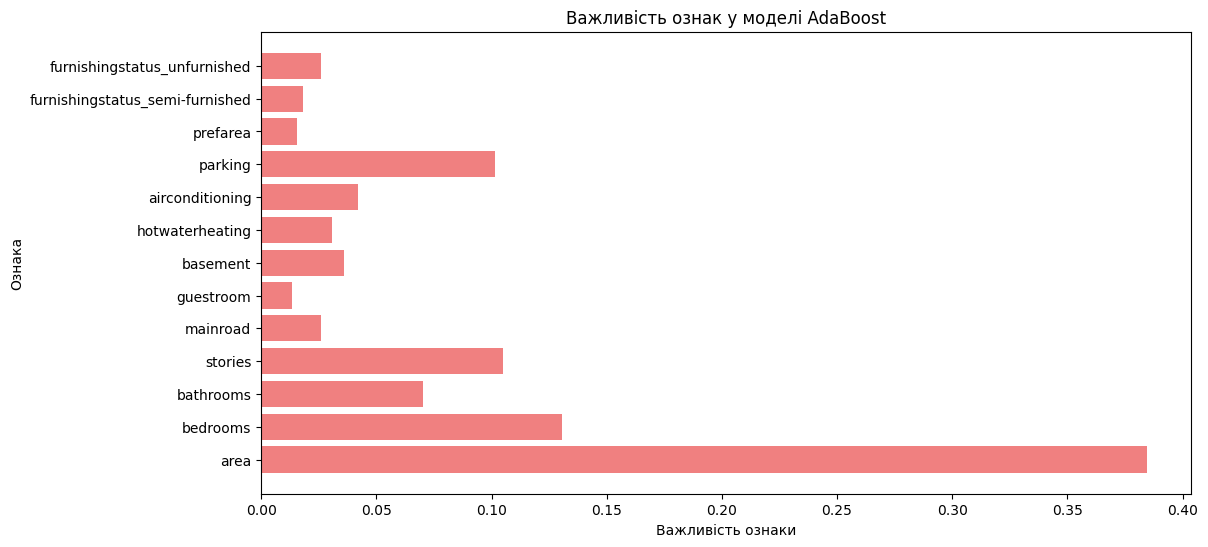

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Налаштування параметрів для GridSearch
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Кількість слабких класифікаторів
    'learning_rate': [0.01, 0.1, 0.5, 1]  # Швидкість навчання
}
# Ініціалізація моделі AdaBoost
ada = AdaBoostClassifier(random_state=42, algorithm="SAMME")

# Пошук найкращих параметрів
grid_search_ada = GridSearchCV(ada, param_grid_ada, scoring='accuracy', cv=5)
grid_search_ada.fit(X_train, y_train)

# Найкраща модель
best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)

# Результати
print("AdaBoost: Найкращі параметри:", grid_search_ada.best_params_)
print("\nClassification Report для AdaBoost:")
print(classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix для AdaBoost:")
print(confusion_matrix(y_test, y_pred_ada))

# Візуалізація важливості ознак
importances = best_ada.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='lightcoral')
plt.xlabel("Важливість ознаки")
plt.ylabel("Ознака")
plt.title("Важливість ознак у моделі AdaBoost")
plt.show()


Аналіз результатів усіх моделей дозволяє зробити висновок, що Random Forest працює краще, ніж інші моделі, зокрема AdaBoost, SVM, Decision Tree та kNN. Ось детальні причини цього вибору:
Порівняння основних метрик

Accuracy (Точність):
Random Forest: 71%
AdaBoost: 68%
Інші моделі (SVM, Decision Tree, kNN): нижче 70%
Random Forest показує найвищу загальну точність серед усіх моделей, що є важливим для класифікації.

Precision, Recall, F1-Score:
У Random Forest баланс precision, recall і f1-score для класів high і low є стабільно високим (понад 0.75).
У AdaBoost спостерігається схожа картина для класів high і low, але показники для класу medium нижчі (F1-Score: 0.43 в AdaBoost vs. 0.53 у Random Forest).

Confusion Matrix:
Random Forest краще справляється з класифікацією класу medium (25 правильних передбачень проти 19 у AdaBoost).
Обидві моделі мають високий рівень правильних передбачень для класів high і low, але Random Forest допускає менше помилок.

Чому Random Forest працює краще?

Механізм роботи:
Random Forest об'єднує результати великої кількості дерев рішень, зменшуючи ймовірність переобучення та забезпечуючи більш стабільний результат.
Використання випадкової вибірки ознак та даних для побудови кожного дерева дозволяє Random Forest бути більш стійким до шуму в даних.

Різноманітність дерев:
Random Forest має глибше охоплення патернів у даних завдяки своїй структурі. У порівнянні, AdaBoost будує послідовність моделей, які фокусуються на "важких" прикладах, що може бути проблемою у випадках, коли класи нерівномірно представлені.

Вплив параметрів:
У Random Forest параметри max_depth і n_estimators дозволяють добре налаштувати модель для збалансування між продуктивністю та швидкістю навчання.




<h2> <b>  Висновок </b> </h2>
На основі результатів метрик Random Forest є найкращою моделлю серед усіх розглянутих. Вона забезпечує найвищу загальну точність, збалансовані метрики для всіх класів і найменше число помилок у класифікації. Це робить Random Forest оптимальним вибором для цієї задачі.